In [ ]:
from src.forest_game import ForestCollectionMDP
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])


# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=1,
    max_steps_follower=1,
    leader_starts_first=True
)

# Visualize the forest
game.visualize_forest()

In [ ]:
# Build our own test tree
from src.solvers.forest_epf_solver import GameNode, ForestEPFSolver

def build_tree() -> GameNode:
    root_follower_node = GameNode(state=None, player=1, is_terminal=False)
    end_node_1 = GameNode(state=None, player=1, is_terminal=True)
    end_node_2 = GameNode(state=None, player=1, is_terminal=True)

    epf1 = EPF()
    epf1.add_point(-1, 10)
    end_node_1.epf = epf1

    epf2 = EPF()
    epf2.add_point(1, -1)
    end_node_2.epf = epf2

    leader_node_1 = GameNode(state=None, player=0, is_terminal=False)
    leader_node_2 = GameNode(state=None, player=0, is_terminal=True)

    epf3 = EPF()
    epf3.add_point(0, 0)
    leader_node_2.epf = epf3

    root_follower_node.add_child(Action.DOWN, leader_node_1)
    root_follower_node.add_child(Action.UP, leader_node_2)
    leader_node_1.add_child(Action.DOWN, end_node_1)
    leader_node_1.add_child(Action.UP, end_node_2)

    return root_follower_node

tree = build_tree()
solver = ForestEPFSolver(None)

solver._compute_epfs(tree)

mu2_opt, u1_opt = tree.epf.get_maximum_point()
print(f"Optimal solution: Leader={u1_opt:.2f}, Follower={mu2_opt:.2f}")
solver.visualize_epf(tree)


In [ ]:
# Build our own test tree
from src.solvers.forest_epf_solver import GameNode, EPF, Action, ForestEPFSolver

def build_tree() -> GameNode:
    root_follower_node = GameNode(state=None, player=1, is_terminal=False)
    end_node_1 = GameNode(state=None, player=1, is_terminal=True)
    end_node_2 = GameNode(state=None, player=1, is_terminal=True)
    end_node_3 = GameNode(state=None, player=1, is_terminal=True)
    end_node_4 = GameNode(state=None, player=1, is_terminal=True)

    # Set EPFs after creation
    epf1 = EPF()
    epf1.add_point(-1, 10)
    end_node_1.epf = epf1

    epf2 = EPF()
    epf2.add_point(1, -1)
    end_node_2.epf = epf2

    epf3 = EPF()
    epf3.add_point(0, 0)
    end_node_3.epf = epf3

    epf4 = EPF()
    epf4.add_point(0.5, 4)
    end_node_4.epf = epf4

    leader_node_1 = GameNode(state=None, player=0, is_terminal=False)
    leader_node_2 = GameNode(state=None, player=0, is_terminal=False)


    root_follower_node.add_child(Action.DOWN, leader_node_1)
    root_follower_node.add_child(Action.UP, leader_node_2)
    leader_node_1.add_child(Action.DOWN, end_node_1)
    leader_node_1.add_child(Action.UP, end_node_2)
    leader_node_2.add_child(Action.DOWN, end_node_3)
    leader_node_2.add_child(Action.UP, end_node_4)

    # Debug: check EPFs are set correctly

    return root_follower_node

tree = build_tree()
solver = ForestEPFSolver(None)

solver._compute_epfs(tree)

mu2_opt, u1_opt = tree.epf.get_maximum_point()
print(f"Optimal solution: Leader={u1_opt:.2f}, Follower={mu2_opt:.2f}")
solver.visualize_epf(tree)


In [ ]:
from src.solvers.forest_epf_solver import GameNode, EPF, Action, ForestEPFSolver
from src.forest_game import ForestCollectionMDP
import numpy as np

# Create custom forest map
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])


# Initialize game
game = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=6,
    max_steps_follower=6,
    leader_starts_first=False
)


solver = ForestEPFSolver(game)
_, _, strategy = solver.solve(game.get_initial_state())
#solver.visualize_tree()
solver.visualize_epf(solver.game_tree)
# print("\nMixed strategy:")
# for state_key, actions in strategy.items():
#     if actions:
#         print(f"  {state_key}: {actions}")


--- Discount factor γ = 0.8 ---
INFINITE HORIZON EPF SOLVER (γ = 0.8)
Found 162 reachable states
✓ Converged after 15 iterations


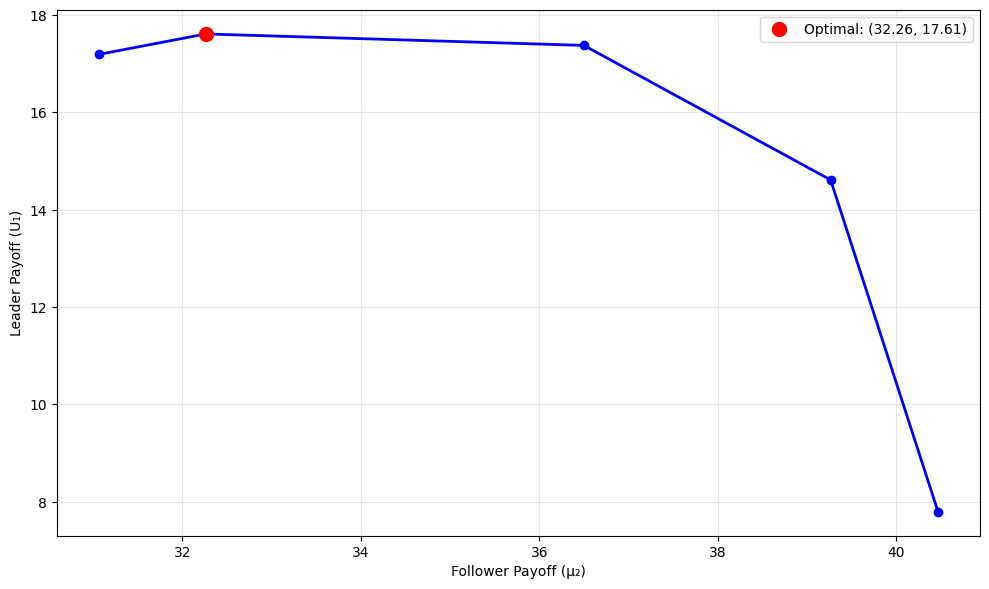

Infinite horizon optimal leader payoff: 17.613
Converged: True

--- Discount factor γ = 0.9 ---
INFINITE HORIZON EPF SOLVER (γ = 0.9)
Found 162 reachable states
✓ Converged after 29 iterations


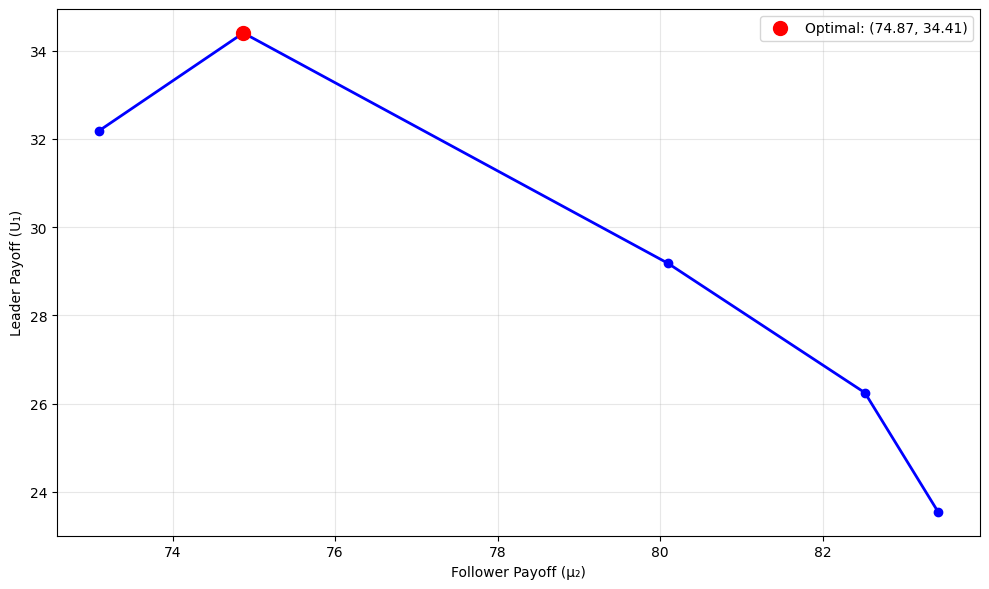

Infinite horizon optimal leader payoff: 34.406
Converged: True

--- Discount factor γ = 0.95 ---
INFINITE HORIZON EPF SOLVER (γ = 0.95)
Found 162 reachable states
✗ Did not converge after 50 iterations


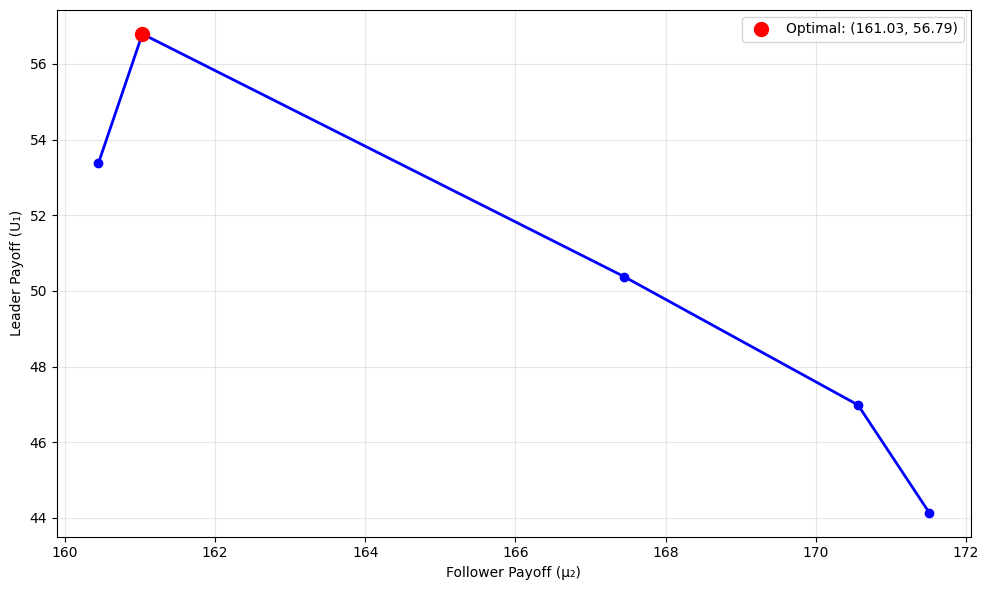

Infinite horizon optimal leader payoff: 56.792
Converged: False


In [3]:
from matplotlib import pyplot as plt
from src.solvers.infinite_horizon_solver import InfiniteForestMDP, InfiniteForestEPFSolver
import numpy as np
from src.forest_game import ForestCollectionMDP

# Create finite horizon game
forest_map = np.array([
    [[5, 2], [3, 8], [7, 1]],
    [[2, 9], [8, 3], [4, 6]],
    [[6, 1], [1, 7], [9, 4]]
])

# Initialize game
finite_mdp = ForestCollectionMDP(
    grid_size=(3, 3),
    forest_map=forest_map,
    leader_start=(0, 0),
    follower_start=(2, 2),
    max_steps_leader=1,
    max_steps_follower=1,
    leader_starts_first=True
)

# Convert to infinite horizon
infinite_mdp = InfiniteForestMDP(finite_mdp)

for gamma in [0.8, 0.9, 0.95]:
    print(f"\n--- Discount factor γ = {gamma} ---")
    infinite_solver = InfiniteForestEPFSolver(
        infinite_mdp,
        discount_factor=gamma,
        max_iterations=50,
        convergence_threshold=0.1  # Reasonable threshold for max payoff changes
    )

    infinite_solution = infinite_solver.solve()
    infinite_leader = infinite_solution['optimal_point'][1]  # leader payoff

    epf = infinite_solution['root_epf']
    mu2_values = [p.follower_payoff for p in epf.points]
    u1_values = [p.leader_payoff for p in epf.points]

    plt.figure(figsize=(10, 6))
    plt.plot(mu2_values, u1_values, 'b-o', linewidth=2, markersize=6)

    plt.xlabel('Follower Payoff (μ₂)')
    plt.ylabel('Leader Payoff (U₁)')
    plt.grid(True, alpha=0.3)

    # Highlight optimal point
    mu2_opt, u1_opt = epf.get_maximum_point()
    plt.plot(mu2_opt, u1_opt, 'ro', markersize=10, label=f'Optimal: ({mu2_opt:.2f}, {u1_opt:.2f})')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Infinite horizon optimal leader payoff: {infinite_leader:.3f}")
    print(f"Converged: {infinite_solution['converged']}")
